# DUAW: Building of a recommendation system

###### Aim: Based on a displayed project Techlabs three further projects would be proposed

###### Dataset: 
0. Testing dataset: manually made text data for 35 projects (JSON file)
1. The Github API requests deliver information from the "About" section - saved in JSON file
2. Final dataset: growing project repositories from Techlabs displayed on DUAW website

#### Text based analysis
#### Exploratory data analysis: 
- word clouds
- counting of words

- sequence matcher: from difflib import SequenceMatcher # 

#### Machine learning algorithms from scitlearn for text data
- Bag of words 
- BERT

###### weighing of repeated terms:
- log 1 p transformation
- Tf-idf (Term Frequency, inverse document frequency)

##### Similarity analysis code
- cosine similarity
- euclidean distance
- others?

##### choise of recomendation
- numpy arg sort (argument sorting) for taking the [-2, -4] arguments

##### comparison for the Testing dataset
- heatmap of similarity analysis
- comparison of results from similarity analysis

#### Choice of similarity analysis 

#### implementation for the final dataset, which would be growing with the additions of further repositories.

#### Final result: JSON file with the repository name and the 3 nearest neighbours
safed on Github, that can be accessed and used as routing directions for the website




In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
#from scipy import stats
#from sklearn.linear_model import LinearRegression

In [3]:
def display_all(df):
    with pd.option_context('display.max_rows',None,'display.max_columns', None):
        display(df)  

##### 1) Loading data

In [4]:
filename = "DUAW_ Datasheet - Sheet1.csv" # Choose file
whole_table = pd.read_csv(filename)
whole_table.head(39) 

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,future Github repostiory name,Full Project name (for display),up to 350 Char,"3-4 Words, comma seperated",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Project number,(place for notes for communication),project_name,project_name_full,project_description,project_topics,project_picture,project_picture_large,link to Github repository,...,github_name,github_url,name:,full_name:,track:,github_name:,github_url:,linkedin_url:,email_adress:,display:
3,NaN,1. Example:,We only need information on the green columns!,test-repository-1,Test Respository,This is a test repository that helps the DUAW ...,"project, duaw, API",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1,already in fake techlabs,st21-beachblue,Beachblue,The idea behind Beachblue is to help everyone ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,2,already in fake techlabs,st21-what-street-art,What Street Art,What Street Art is an app designed to explore ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,3,already in fake techlabs,Travel-20,Travel 20,Travel 21 aims to simplify the research for tr...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,4,already in fake techlabs,st21-busking-radar,Busking Radar,Busking Radar is the final group project which...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,5,already in fake techlabs,st21-what-the-wine,What the Wine,What the Wine is a team Web/App project develo...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,6,already in fake techlabs,st21-artifacts,Artifacts,Artifacts - Born from an idea to provide the B...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2) Data cleaning


In [12]:
data_df = whole_table.iloc[2:,[3,5]]
data_df.rename(columns=data_df.iloc[0], inplace = True)
data_df.drop(data_df.index[0], inplace = True)
#data_df = data_df.set_index('Unnamed: 0')
data_df

,project_name,project_description
3,test-repository-1,This is a test repository that helps the DUAW ...
4,st21-beachblue,The idea behind Beachblue is to help everyone ...
5,st21-what-street-art,What Street Art is an app designed to explore ...
6,Travel-20,Travel 21 aims to simplify the research for tr...
7,st21-busking-radar,Busking Radar is the final group project which...
8,st21-what-the-wine,What the Wine is a team Web/App project develo...
9,st21-artifacts,Artifacts - Born from an idea to provide the B...
10,st21-jobzilla,"Jobzilla is an AI-driven app, which will find ..."
11,st21-terraViz,TerraViz is an interactive map visualization w...
12,st21-stress-tracker,This repository represents a stress tracking p...


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import euclidean_distances

/Users/constanze/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


#### Remove punctuation/lower casing

In [25]:
# Load the regular expression library
import re
# Remove punctuation
data_df['paper_text_processed'] = \
data_df['project_description'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
data_df['paper_text_processed'] = \
data_df['paper_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
data_df['paper_text_processed'].head()

3    this is a test repository that helps the duaw ...
4    the idea behind beachblue is to help everyone ...
5    what street art is an app designed to explore ...
6    travel 21 aims to simplify the research for tr...
7    busking radar is the final group project which...
Name: paper_text_processed, dtype: object

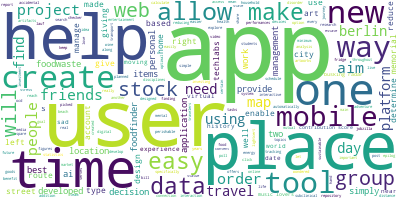

In [27]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(data_df['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

##### 

In [16]:
corpus = data_df.project_description
corpus

3     This is a test repository that helps the DUAW ...
4     The idea behind Beachblue is to help everyone ...
5     What Street Art is an app designed to explore ...
6     Travel 21 aims to simplify the research for tr...
7     Busking Radar is the final group project which...
8     What the Wine is a team Web/App project develo...
9     Artifacts - Born from an idea to provide the B...
10    Jobzilla is an AI-driven app, which will find ...
11    TerraViz is an interactive map visualization w...
12    This repository represents a stress tracking p...
13    Find your own time management type for extra p...
14    Foodfinder is a digital tool to manage your fr...
15    SimpleCare offers the possibility to publish s...
16    AllOkayApp is an App designed to assist people...
17    Let’s Remember” delivers insights about the po...
18    ImmoScan aims to make the real estate market m...
19    “NutriFinder” calculates the individually requ...
20    Osoroi Code aims to create a clothes match

In [23]:
vectorizer = CountVectorizer() # numrac list
features = vectorizer.fit_transform(corpus).todense() # each of these documents, in list of numbers
#print( vectorizer.vocabulary_ ) # dic with all existing words (count)

In [18]:
for f in features:
    print( euclidean_distances(features[0], f) ) # distance between documents

[[0.]]
[[8.18535277]]
[[9.43398113]]
[[8.24621125]]
[[10.14889157]]
[[7.54983444]]
[[12.52996409]]
[[8.71779789]]
[[6.8556546]]
[[7.]]
[[11.66190379]]
[[10.63014581]]
[[7.81024968]]
[[10.58300524]]
[[8.54400375]]
[[8.18535277]]
[[9.32737905]]
[[7.21110255]]
[[10.63014581]]
[[12.88409873]]
[[9.8488578]]
[[7.21110255]]
[[10.77032961]]
[[14.89966443]]
[[11.87434209]]
[[9.89949494]]
[[8.06225775]]
[[7.54983444]]
[[7.87400787]]
[[11.22497216]]
[[7.14142843]]
[[7.28010989]]
[[8.83176087]]
[[12.72792206]]
[[9.8488578]]
[[8.94427191]]


/Users/constanze/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/constanze/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/constanze/opt/anaconda3/l

In [22]:
import numpy as np
a= np.zeros( (len(features), len(features)) )

a[3][4] = 7
print(a)
len(features)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


36

x=-1
y=-1
for each in features:
    x=x+1
    for f in features:
        y=y+1
        value =  euclidean_distances(each, f) # distance between documents
        a[y][x]=value
    y=-1
print(a)